## EXE - 4
### Submitted by:
### Jasmeet Kaur
### Student ID: 100881373

_____________________________________________________________________________________________________________________________

Table of Contents:
1. Business Problem
2. Importing the Dataset
3. Exploratory Data Analysis (EDA) <br>
  3.1 Data Overview <br>
  3.2 Data Cleaning/ Data wrangling (Deleting Duplicate Lines etc.)<br>
  3.3 Report: Making Frequency Distribution and Pie Chart of target variable  <br>
  3.4 Statistical Analysis <br>
4. Data Preprocessing
  4.1 Outlier Management <br>
  4.2 Feature Engineering and Selection <br>
5. Model Preparation
  5.1 Splitting the dataset into Train and Test Sets <br>
  5.2 Feature Scaling <br>
6. Machine Learning Models
  6.1 SVM REGRESSION MODEL <br>
     6.1.1 6.1.1 Building Model <br>
     6.1.2 Assessing the model <br>
7. Randomized Grid Search Cross Validation
  7.1 Building Model <br>
  7.2 Assessing model <br>
  
8. Cross Validation using K - Stratification
9. Summary :Comparison of SVM Models
10. Conclusion


## 1. Business Problem
Human activity recognition is crucial in human-to-human contact and interpersonal relationships. It is tough to extract information about a person's identity, personality, and psychological condition. One of the critical objects of research in the scientific fields of computer vision and machine learning is the human capacity to identify another person's activity. A multimodal activity recognition system is required for many applications, including video surveillance systems, human-computer interfaces, and robotics for human behavior characterization. Human activity recognition is an essential topic that focuses on recognizing a person's movement or action based on sensor data. Movements are everyday indoor activities such as walking, conversing, standing, and sitting. They might also be more concentrated tasks, such as those conducted in a kitchen or manufacturing floor. Sensor data, such as video, radar, or other wireless means, may be captured remotely. Data may also be collected directly on the subject, carrying specialized gear or smartphones equipped with accelerometers and gyroscopes.
Sensor data for activity detection has traditionally been difficult and costly, necessitating bespoke gear. 

The given jupyter notebook presents Human Activity Recognition as a multi avriate time series classification problem. The goal is to forecast activity based on the given dataset as a snapshot of sensor data, often from one or a few sensors. Thus the jupyter notebook illustrates multivariate time series classification challenge.

It is a difficult challenge since there are no clear or straightforward methods to match the recorded sensor data to particular human behaviors. Each subject may conduct an activity differently, resulting in variances in the recorded sensor data.

<b>Dataset Information:</b><br>
Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.

Data Set Characteristics: Multivariate, Time-Series

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

### Importing required modules

In [1]:
!pip install sweetviz
import sweetviz as sv
import numpy as np 
import pandas as pd
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import  Image
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor


## 2. Importing the dataset

In [2]:
#Reading the dataset stored as a .csv file.
dataset = pd.read_csv("C:/Users/100902467/Desktop/AI Algo/SVM/test.csv")

#Displaying the first five rows of the dataset.
dataset.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


## 3. Exploratory Data Analysis

#### 3.1 Data overview

In [3]:
# Basic data statistics
print ("Rows     : " ,dataset.shape[0])
print ("Columns  : " ,dataset.shape[1])
print ("\nFeatures : \n" ,dataset.columns.tolist())
print ("\nMissing values :  ", dataset.isnull().sum().values.sum())
print ("Unique values  :  \n",dataset.nunique())



Rows     :  2947
Columns  :  563

Features : 
 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGr

#### 3.2 Data Cleaning/ Data wrangling

In [4]:
# Deleting Duplicate Lines and keeping last record
dataset = dataset.drop_duplicates(keep='last')
#Checking number of rows
dataset.shape[0]

2947

##### The number of rows is same as before so no duplicate records were there in dataset

#### 3.3 Report: Making Frequency Distribution and Pie Chart of target variable

In [5]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=dataset["Activity"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

col_0,count
Activity,
LAYING,537
SITTING,491
STANDING,532
WALKING,496
WALKING_DOWNSTAIRS,420
WALKING_UPSTAIRS,471


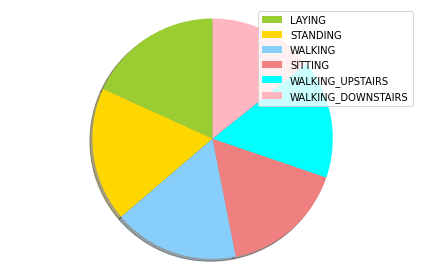

In [6]:
# Visualizing Outcome Distribution 
temp = dataset["Activity"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

#df.plot(kind='pie',labels='labels',values='values', title='Activity Ditribution',subplots= "True")

labels = df['labels']
sizes = df['values']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

#### 3.4 Statistical Analysis

##### 3.4.1 Statistical Summary: 
Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. It shows the data type of variables and count of non null values for the variables

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [8]:
print("Any missing sample in training set:",dataset.isnull().values.any())

Any missing sample in training set: False


From the above results it can be inferred all the features except Activity are of floating type. Also none of the feature contains null value and have all 2947 records.

##### 3.4.2 Displaying Descriptive statistics
Dataframe.describe() method is used for Descriptive statistics including those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [9]:
dataset.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720,12.986427
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467,6.950984
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228,2.000000
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485,9.000000
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671,12.000000
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373,18.000000
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113,24.000000


#### 3.5 Label Encoding Target Variable 

In [10]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
dataset['Activity_encode']= label_encoder.fit_transform(dataset['Activity'])
  
dataset['Activity_encode'].unique()

array([2, 1, 0, 3, 4, 5])

#### 3.6 Analysing Distribution of Features

In [11]:
skewness = pd.DataFrame(dataset.skew(), columns = ['skewness'])
skewness

,skewness
tBodyAcc-mean()-X,-3.560410
tBodyAcc-mean()-Y,-0.515043
tBodyAcc-mean()-Z,1.420129
tBodyAcc-std()-X,0.494632
tBodyAcc-std()-Y,0.512983
...,...
"angle(X,gravityMean)",1.485150
"angle(Y,gravityMean)",-1.290936
"angle(Z,gravityMean)",-1.004312
subject,0.020313


In [12]:
skewness['skewness'] = ["Positively skewed" if i >= 1 else "Negatively skewed" if i <= -1 else "Normal Distribution" for i in skewness['skewness']]
skewness

,skewness
tBodyAcc-mean()-X,Negatively skewed
tBodyAcc-mean()-Y,Normal Distribution
tBodyAcc-mean()-Z,Positively skewed
tBodyAcc-std()-X,Normal Distribution
tBodyAcc-std()-Y,Normal Distribution
...,...
"angle(X,gravityMean)",Positively skewed
"angle(Y,gravityMean)",Negatively skewed
"angle(Z,gravityMean)",Negatively skewed
subject,Normal Distribution


<b>There are many skewed features on data. We must solve this issue too. This will be solved via Standardization in Data Preprocessing</b>

## 4. Data Preprocessing

#### 4.1 Outlier Management

Local Outlier Factor method will be used to detect outliers and drop them
Density based Outlier Detection: Local Outlier Factor (LOF) : Compare local density of one point to local density of its K-NN
LOF > 1 ==> outlier / anomaly
LOF < 1 ==> inlier

In [13]:
y = dataset['Activity_encode']
x = dataset.drop(['Activity_encode','Activity','subject'], axis = 1)
columns = x.columns.tolist()

In [14]:
# displaying columns
columns

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [15]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x) # Returns -1 for anomalies/outliers and +1 for inliers.
X_score = clf.negative_outlier_factor_
X_score

array([-1.13292833, -1.20862368, -1.162143  , ..., -1.02092804,
       -1.02045375, -1.01766348])

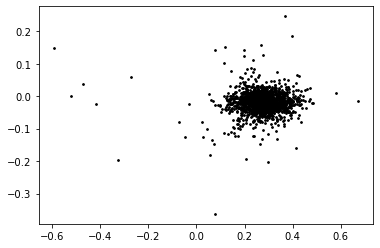

In [16]:
# Plotting points for Apps and Accept as example plots
plt.figure()
# radius_mean and texture_mean as an example plot
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Point')
plt.show()

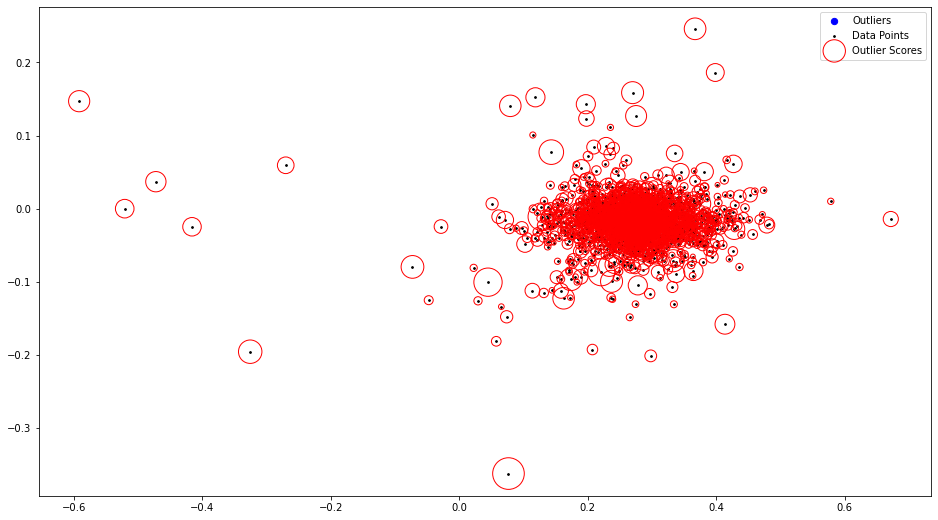

In [17]:
# plotting outliers based on threshold
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

# threshold for negative lof values
threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()

# Let's plot the outliers based on threshold we set
plt.figure(figsize = (16, 9))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = 'blue', s = 40, label = 'Outliers')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Points')
# Normalization
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())  
plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [18]:
# Dropping records pertaining to outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index)

In [19]:
x.shape

(2947, 561)

<b> Conclusion: </b> No records were dropped and therefore no outliers were identified.

#### 4.2 Feature Engineering and Selection

From the correlation matrix we saw earlier, it was clear that there are quite a few features with very high correlations. So I dropped one of the features, from each of the feature pairs which had a correlation greater than 0.95. 

In [20]:
# Create correlation matrix
corr_matrix = x.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features 
x = x.drop(x[to_drop], axis=1)
# Displaying remaining features
x.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-Z',
       'tBodyAcc-energy()-Y',
       ...
       'fBodyBodyGyroMag-meanFreq()', 'fBodyBodyGyroMag-skewness()',
       'fBodyBodyGyroJerkMag-min()', 'fBodyBodyGyroJerkMag-maxInds',
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)'],
      dtype='object', length=252)

In [21]:
x.shape

(2947, 252)

##### Out of 561 features only 252 features are selected for feature Engineering

## 5. Model Preparation

#### 5.1 Splitting the dataset into Train and Test Sets

In [22]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

#### 5.2 Feature Scaling
sklearn’s Robust Scaler was used to scale the features of the dataset. The centering and scaling statistics of this scaler are based on percentiles and are therefore not influenced by a few number of very large marginal outliers.

In [23]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 6. Machine Learning Models

### 6.1 Support Vector Machine Model

#### 6.1.1 Building Model

In [24]:
# Building SVM Model
# Importing libraries
from sklearn.svm import SVC
svm_r = SVC(kernel='rbf')
svm_r.fit(x_train, y_train)

SVC()

#### 6.1.2 Assessing the model

In [25]:
#Predict the response for test dataset
y_pred_lt = svm_r.predict(x_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy of the SVM model is :",metrics.accuracy_score(y_test, y_pred_lt))

Accuracy of the SVM model is : 0.9389830508474576


## 7. Randomized Grid Search Cross Validation

One of the most popular approaches to tune Machine Learning hyperparameters is called RandomizedSearchCV() in scikit-learn. Let’s dissect what this means.

In Randomised Grid Search Cross-Validation we start by creating a grid of hyperparameters we want to optimise with values that we want to try out for those hyperparameters.

#### 7.1 Building Model

In [26]:
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [27]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

#### 7.2 Assessing the Model

In [28]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(x_test)


Best score for training data: 0.9665354145607561 

Best C: 1000 

Best Kernel: rbf 

Best Gamma: 0.0001 



## 8. Cross Validation using K - Stratification

Cross-validation (CV) is a technique used to assess a machine learning model and test its performance (or accuracy). It involves reserving a specific sample of a dataset on which the model isn't trained. Later on, the model is tested on this sample to evaluate it. In K-fold Cross-Validation (CV) we still start off by separating a test/hold-out set from the remaining data in the data set to use for the final evaluation of our models. The data that is remaining, i.e. everything apart from the test set, is split into K number of folds (subsets). The Cross-Validation then iterates through the folds and at each iteration uses one of the K folds as the validation set while using all remaining folds as the training set. This process is repeated until every fold has been used as a validation set.

In [29]:
# Train/Test split 
# The dataset was stratified in order to preserve the proportion of target as in the original dataset, 
# in the train and test datasets as well.
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(x, y, stratify = y, random_state=0)

In [30]:
# Displaying scores of models
svm_model2 = SVC(kernel='rbf')
svm_model2.fit(X_train_cross, y_train_cross)
y_pred_cross = svm_model2.predict(X_test_cross)
accuracy_score(y_test_cross, y_pred_cross)

print(accuracy_score(y_test_cross, y_pred_cross))

0.9674355495251018


In [31]:
# Dividing data into ten blocks, for 10-fold cross-validation.
strat_k_fold = StratifiedKFold(n_splits=10, random_state=10, shuffle=True)
score = cross_val_score(svm_model2, x, y, cv=strat_k_fold, scoring='accuracy').mean()
print(score)

0.9711622276029056


##### The accuracy score of model after applying Cross Validation is 0.971

## 9. Summary :Comparison of SVM Models

Let's compare the performances of all variations of SVM Model

In [32]:
prediction_columns = ["NAME OF MODEL", "ACCURACY SCORE", "BEST ACCURACY (AFTER HYPER-PARAMETER TUNING)"]
df_pred = {"NAME OF MODEL" : ["SVM Model", "SVM Model Randomized Grid Search Cross Validation","SVM Model Cross Validation using K - Stratification"],
           "ACCURACY SCORE " : [metrics.accuracy_score(y_test, y_pred_lt),svm_model.best_score_ ,score], 
           }
df_predictions = pd.DataFrame (df_pred)
df_predictions

,NAME OF MODEL,ACCURACY SCORE
0,SVM Model,0.938983
1,SVM Model Randomized Grid Search Cross Validation,0.966535
2,SVM Model Cross Validation using K - Stratific...,0.971162


#### All the variations of SVM model have slight differences. Therefore, SVM model is good approach to forecast activity based on the given dataset. SVM Model Cross Validation using K Stratification is the best among three with 0.971 accuracy score

## 10. Conclusion:
Support Vector Machine (SVM) is the best approach to forecast activity based on the given dataset as a snapshot of sensor data, often from one or a few sensors.